# Question: What are the primary factors for game sales?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## General Look At Data

In [2]:
df = pd.read_excel('steam_sales.xlsx')
print(df.shape)
df.sample(n=5)

(73467, 16)


,appid,name,positive,negative,price,copies_sold,metacritic_score,recommendations,current_users,peak_users,developer,publisher,publisherclass,categories,tags,genres
66728,452240,Dawn of the Robot Empire,8,0,5.99,240.0,0.0,0.0,0,0.0,"oeFun, Inc.","oeFun, Inc.",Hobbyist,"Single-player,VR Support","Action,Indie,Early Access,VR","Action,Indie,Early Access"
56291,1049070,Fidelity,27,6,1.99,741.0,0.0,0.0,0,0.0,Megamini009,Megamini009,Hobbyist,Single-player,"Indie,Casual,Horror,Puzzle,Psychological Horro...","Casual,Indie"
58525,451630,Brute,23,6,6.99,1053.0,0.0,0.0,0,0.0,MGFM,MGFM,Hobbyist,"Single-player,Steam Trading Cards","Indie,Action,Minimalist,Arcade,Audio Production","Action,Indie"
13239,463000,Hero Battle,97,55,6.99,2397.0,0.0,0.0,0,0.0,Wang Liwen,Wang Liwen,Indie,"Multi-player,Steam Trading Cards,Partial Contr...","Massively Multiplayer,Action","Action,Massively Multiplayer"
26148,358840,ZombieRun,25,35,2.99,627.0,0.0,0.0,0,0.0,Guerrilla Bandit,Guerrilla Bandit,Hobbyist,"Single-player,Multi-player,Shared/Split Screen...","Action,Indie,Platformer,Zombies","Action,Indie"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73467 entries, 0 to 73466
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             73467 non-null  int64  
 1   name              70558 non-null  object 
 2   positive          73467 non-null  int64  
 3   negative          73467 non-null  int64  
 4   price             67610 non-null  float64
 5   copies_sold       68428 non-null  float64
 6   metacritic_score  67610 non-null  float64
 7   recommendations   67610 non-null  float64
 8   current_users     73467 non-null  int64  
 9   peak_users        67610 non-null  float64
 10  developer         73154 non-null  object 
 11  publisher         73123 non-null  object 
 12  publisherclass    68428 non-null  object 
 13  categories        66606 non-null  object 
 14  tags              62432 non-null  object 
 15  genres            67526 non-null  object 
dtypes: float64(5), int64(4), object(7)
memor

In [4]:
df.describe()

,appid,positive,negative,price,copies_sold,metacritic_score,recommendations,current_users,peak_users
count,7.346700e+04,7.346700e+04,7.346700e+04,67610.000000,6.842800e+04,67610.000000,6.761000e+04,7.346700e+04,67610.000000
mean,1.289408e+06,1.496774e+03,2.501098e+02,7.909644,7.323451e+04,4.123266,8.878901e+02,1.109180e+02,167.688034
std,7.198192e+05,3.280493e+04,6.254343e+03,10.909671,1.379740e+06,17.012967,1.878420e+04,6.189833e+03,6059.208598
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,6.999350e+05,5.000000e+00,1.000000e+00,1.990000,8.500000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,1.196260e+06,1.800000e+01,5.000000e+00,4.990000,6.290000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000
75%,1.819285e+06,9.800000e+01,2.800000e+01,9.990000,5.353000e+03,0.000000,0.000000e+00,0.000000e+00,1.000000
max,3.005110e+06,7.056084e+06,1.038712e+06,999.000000,2.102553e+08,97.000000,3.441592e+06,1.347110e+06,872138.000000


In [5]:
numeric_cols = df.select_dtypes(include=['number']).columns
quantiles = df[numeric_cols].quantile(0.999)
df = df[(df[numeric_cols] <= quantiles).all(axis=1)]

In [6]:
corr = df.corr(numeric_only=True)

## Heatmap of Correlations

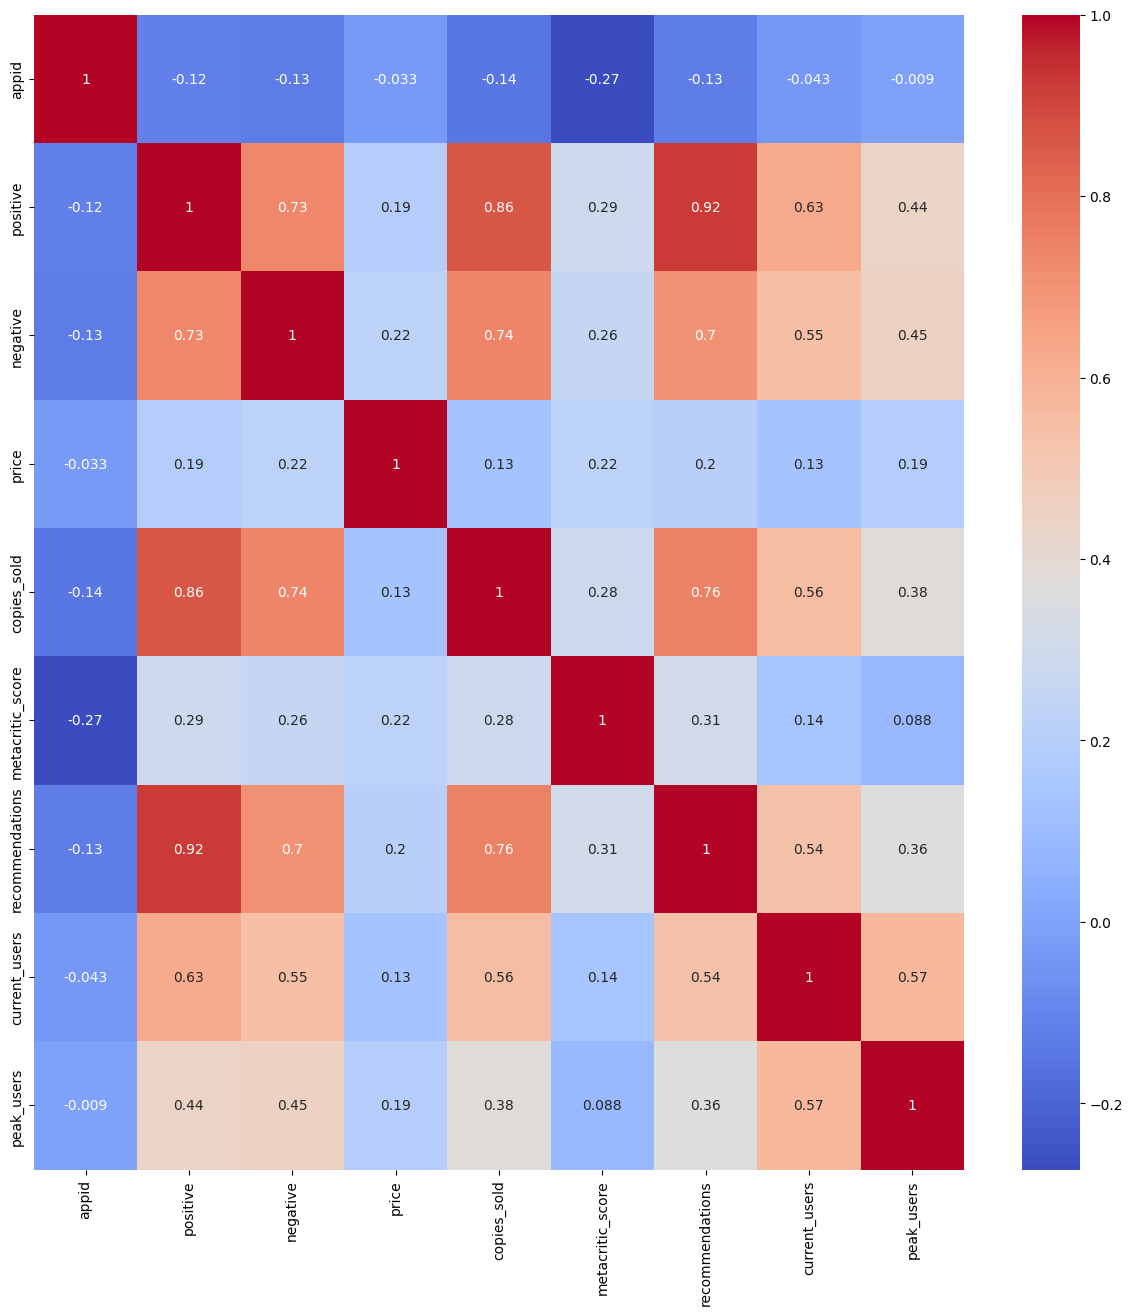

In [7]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.heatmap(df.corr(numeric_only=True).apply(lambda x: round(x, 3)), annot=True, cmap='coolwarm')
plt.show()

## Plots Between Copies Sold And All Numeric Variables

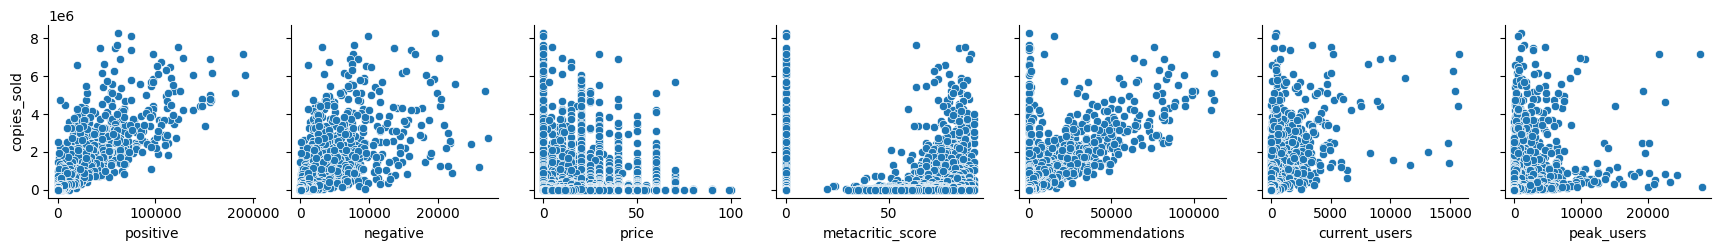

In [8]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.pairplot(
    df,
    x_vars=['positive', 'negative', 'price', 'metacritic_score', 'recommendations', 
            'current_users', 'peak_users'],
    y_vars=['copies_sold'],
)
plt.show()

## Utilizing Log To Grasp Normalized Look

In [9]:
df['log_copies_sold'] = df['copies_sold'].apply(lambda x: np.log1p(x))

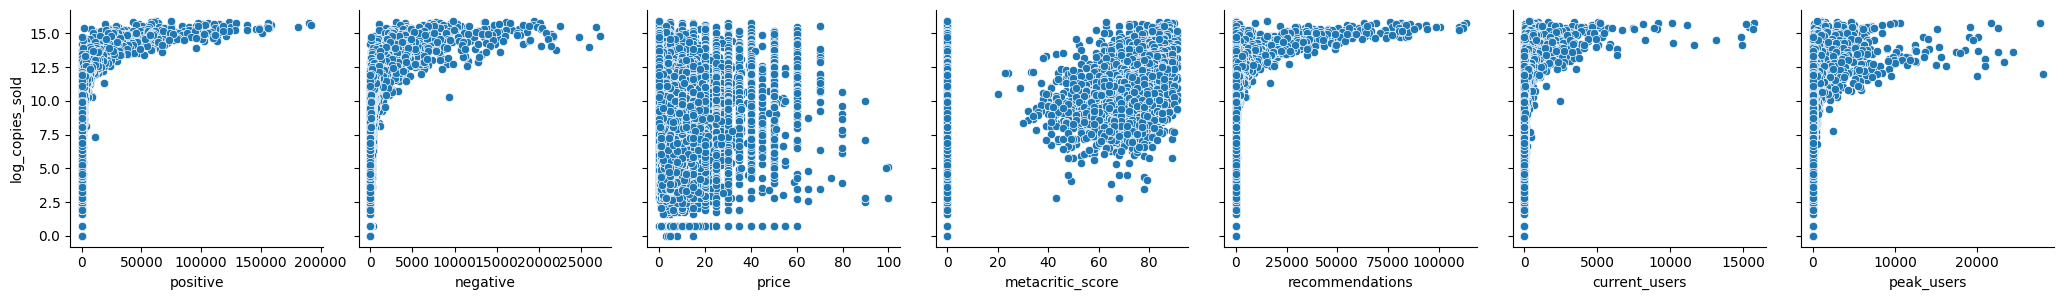

In [10]:
sns.pairplot(
    df,
    x_vars=['positive', 'negative', 'price', 'metacritic_score', 'recommendations', 
            'current_users', 'peak_users'],
    y_vars=['log_copies_sold'],
    height = 3,
    aspect = 1,
    dropna = True
)
plt.show()

In [14]:
df.to_excel('db_for_model.csv')

# General Thoughts:
- Not surprisingly, the ratings, such as positive and negative have a large impact and correlation to the copies sold
- Surprisingly, the price doesn't seem to matter too much, you would assume that games that are more expensive are more likely to have less sales unless it is extremely high quality but it doesn't seem to be the case
- Other than that, all other numeric metrics seem to hold some level of effect to the copies sold
- In order to handle the data and to understand which off these hold the largest effect on the copies sold, a multi-linear regression model will be made